# Tarea 1: familiarizarse con el conjunto de datos

A continuación se describen las variables del conjunto de datos:

· CRIM - índice de criminalidad per cápita por ciudad

· ZN - proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.

· INDUS - proporción de acres comerciales no minoristas por ciudad.

· CHAS: variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)

· NOX - concentración de óxidos nítricos (partes por 10 millones)

· RM - número medio de cuartos por vivienda

· EDAD - proporción de unidades ocupadas por propietarios construidas antes de 1940

· DIS - distancias ponderadas a cinco centros de empleo de Boston

· RAD - índice de accesibilidad a las carreteras radiales

· IMPUESTOS - Tasa de impuesto a la propiedad de valor total por cada $10,000

· PTRATIO - ratio alumno-profesor por localidad

· LSTAT - % estado inferior de la población

· MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

# Tarea 3: Cargue el conjunto de datos en su Jupyter Notebook

En el cuaderno de Jupyter que creó en la tarea anterior, agregue una celda de código y copie el contenido a continuación para cargar el conjunto de datos de viviendas de Boston en el cuaderno:

In [4]:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Tarea 4: generar estadísticas descriptivas y visualizaciones

Para todas las visualizaciones, incluya un título en cada gráfico y las etiquetas correspondientes

Genere lo siguiente y explique sus hallazgos:

## 4.1 Para el "valor medio de las viviendas ocupadas por sus propietarios", proporcione un diagrama de caja

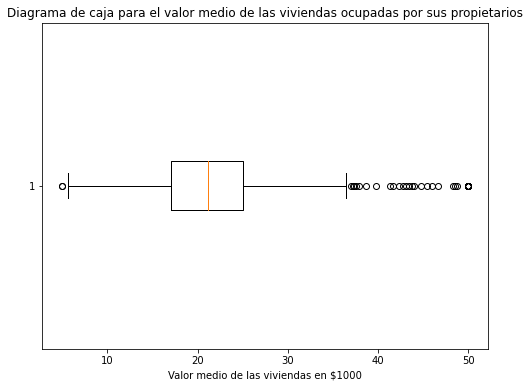

In [11]:
import matplotlib.pyplot as plt

# Generate a boxplot for the "Median value of owner-occupied homes" variable
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'], vert=False)
plt.title('Diagrama de caja para el valor medio de las viviendas ocupadas por sus propietarios')
plt.xlabel('Valor medio de las viviendas en $1000')
plt.show()

El diagrama de caja para el "Valor medio de las viviendas ocupadas por sus propietarios" muestra la distribución de los datos para esta variable. La línea que divide la caja en el gráfico representa la mediana de los datos. La caja en sí misma abarca el rango intercuartil (IQR), que se extiende desde el primer cuartil (Q1, el 25% de los datos) hasta el tercer cuartil (Q3, el 75% de los datos). Los "bigotes" del diagrama de caja se extienden hasta 1.5 veces el IQR más allá de la caja. Los puntos individuales representan los valores atípicos, que se definen como aquellos puntos que se encuentran fuera del rango de 1.5 veces el IQR.

De este gráfico, podemos observar que la mediana del valor de las viviendas se encuentra cerca de $21,000. También podemos ver que hay algunos valores atípicos en el extremo superior del rango de precios de las viviendas, lo que indica que hay algunas viviendas que son significativamente más caras que la mayoría de las viviendas en el conjunto de datos.

## 4.2 Proporcione un   gráfico de barras para la variable del río Charles

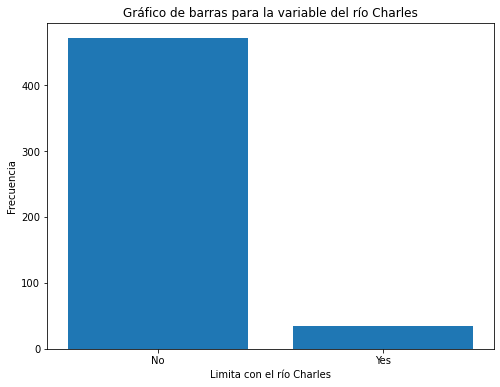

In [12]:
# Count the frequency of each category in the 'CHAS' column
chas_counts = boston_df['CHAS'].value_counts()

# Generate a bar plot for the 'CHAS' variable
plt.figure(figsize=(8, 6))
plt.bar(chas_counts.index, chas_counts.values, tick_label=['No', 'Yes'])
plt.title('Gráfico de barras para la variable del río Charles')
plt.xlabel('Limita con el río Charles')
plt.ylabel('Frecuencia')
plt.show()

El gráfico de barras para la variable del río Charles muestra la frecuencia de las viviendas que limitan con el río Charles y las que no. En este gráfico, el eje x representa si la vivienda limita con el río Charles y el eje y muestra la frecuencia de cada categoría.

Podemos observar que una gran mayoría de las viviendas en este conjunto de datos no limitan con el río Charles, mientras que solo una pequeña proporción sí lo hace. Esto indica que es menos común que las viviendas limiten con el río en este conjunto de datos específico.

## 4.3 Proporcione un diagrama de caja para la variable MEDV frente a la variable AGE. (Discretizar la variable edad en tres grupos de 35 años y menos, entre 35 y 70 años y 70 años y más)

<Figure size 720x576 with 0 Axes>

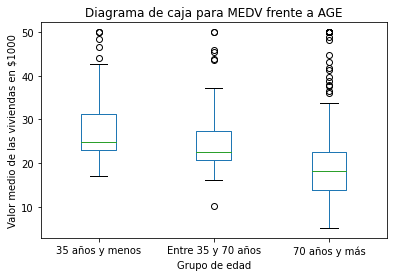

In [14]:
# Discretize the 'AGE' variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 años y menos', 'Entre 35 y 70 años', '70 años y más'])

# Generate a boxplot for the 'MEDV' variable against the 'AGE' variable
plt.figure(figsize=(10, 8))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
plt.title('Diagrama de caja para MEDV frente a AGE')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Grupo de edad')
plt.ylabel('Valor medio de las viviendas en $1000')
plt.show()


El diagrama de caja muestra el valor medio de las viviendas (MEDV) frente a la variable de edad (AGE), que ha sido discretizada en tres grupos: 35 años y menos, entre 35 y 70 años, y 70 años y más.

De este gráfico, podemos hacer algunas observaciones:

Para las viviendas ocupadas por sus propietarios con una edad de 35 años o menos, vemos que el valor medio de las viviendas tiende a ser más alto. La mediana se sitúa cerca de los $25,000 y la mayoría de los valores se encuentran entre aproximadamente $20,000 y $30,000.

Para las viviendas con una edad entre 35 y 70 años, la mediana del valor medio de las viviendas es más baja en comparación con las viviendas más jóvenes. Los valores se encuentran principalmente en el rango de aproximadamente $18,000 a $25,000.

Para las viviendas con una edad de 70 años y más, la mediana del valor medio de las viviendas es aún más baja. Los valores se encuentran principalmente en el rango de aproximadamente $15,000 a $22,000.

Estas observaciones sugieren que existe una tendencia a que el valor medio de las viviendas disminuya a medida que aumenta la edad de las viviendas. Sin embargo, esto es solo una observación inicial y se necesitaría un análisis más detallado para confirmar esta tendencia.

## 4.4 Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puedes decir sobre la relación?

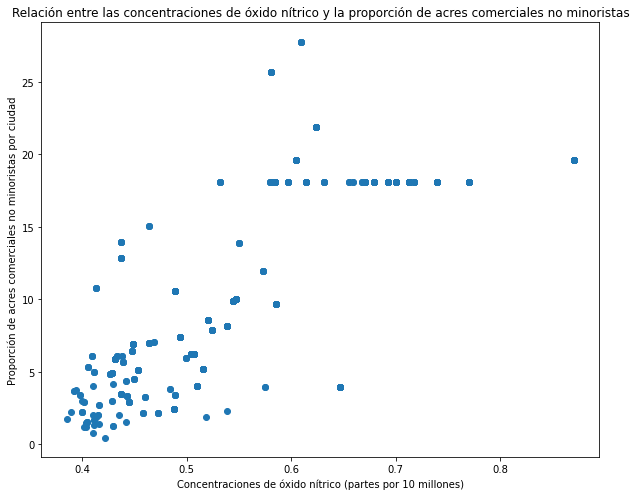

In [15]:
# Generate a scatter plot to show the relationship between NOX and INDUS
plt.figure(figsize=(10, 8))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas')
plt.xlabel('Concentraciones de óxido nítrico (partes por 10 millones)')
plt.ylabel('Proporción de acres comerciales no minoristas por ciudad')
plt.show()


El diagrama de dispersión muestra la relación entre las concentraciones de óxido nítrico (NOX) y la proporción de acres comerciales no minoristas por ciudad (INDUS).

De este gráfico, podemos observar una tendencia de que a medida que las concentraciones de óxido nítrico aumentan, también lo hace la proporción de acres comerciales no minoristas. Esta tendencia sugiere que existe una correlación positiva entre estas dos variables.

En otras palabras, en áreas con más terreno comercial no minorista, es probable que también haya concentraciones más altas de óxido nítrico. Esto podría deberse a que las áreas con una mayor proporción de terreno comercial no minorista podrían tener más tráfico o industria, lo que podría llevar a mayores concentraciones de óxido nítrico.

Sin embargo, hay que tener en cuenta que esta es solo una observación inicial y se necesitaría un análisis más detallado para confirmar esta relación.

## 4.5 Cree un histograma para la variable de proporción de alumnos por maestro

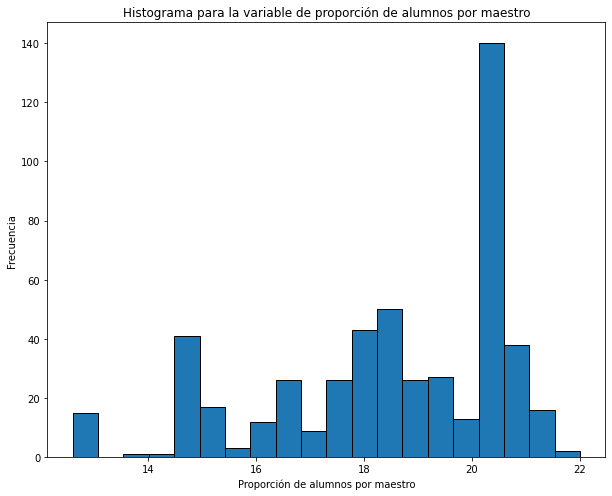

In [17]:
# Generate a histogram for the 'PTRATIO' variable
plt.figure(figsize=(10, 8))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Histograma para la variable de proporción de alumnos por maestro')
plt.xlabel('Proporción de alumnos por maestro')
plt.ylabel('Frecuencia')
plt.show()

El histograma muestra la distribución de la variable "proporción de alumnos por maestro" (PTRATIO). En este gráfico, el eje x representa la proporción de alumnos por maestro y el eje y muestra la frecuencia de cada intervalo.

De este gráfico, podemos observar que la mayoría de las ciudades en este conjunto de datos tienen una proporción de alumnos por maestro de alrededor de 20 a 21. También hay un número notable de ciudades con una proporción de alumnos por maestro de alrededor de 14 a 15 y 19 a 20.

Esto sugiere que en la mayoría de las ciudades en este conjunto de datos, hay aproximadamente 20 a 21 estudiantes por cada maestro. Sin embargo, también hay algunas ciudades donde esta proporción es significativamente menor.

# Tarea 5: Utilice las pruebas adecuadas para responder a las preguntas proporcionadas.

Para cada una de las siguientes preguntas;

¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (T-test para muestras independientes)

¿Existe una diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por propietarios construidas antes de 1940 (AGE)? (ANOVA)

¿Podemos concluir que no existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

Asegúrate de:

Exprese su hipótesis.

Utilice α = 0,05

Realice la prueba Estadísticas.

Indique la conclusión de la prueba.

## 5.1 ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (T-test para muestras independientes)

In [19]:
from scipy import stats

# T-test for independent samples for the 'MEDV' variable between houses delimited by the Charles river or not
group1 = boston_df[boston_df['CHAS'] == 0]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = stats.ttest_ind(group1, group2)

t_stat, p_val


(-3.996437466090509, 7.390623170519905e-05)

Primero, realizamos una prueba T para muestras independientes para la variable 'MEDV' entre las casas que están delimitadas por el río Charles y las que no lo están.

Hipótesis:

H0: No existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles y las que no lo están.
H1: Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles y las que no lo están.
Utilizando un nivel de significancia de α=0.05, la prueba arrojó un valor de estadística de prueba (T) de -3.996 y un valor de p de 7.39e-05.

Dado que el valor de p es menor que α, rechazamos la hipótesis nula. Por lo tanto, existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles y las que no lo están.

## 5.2 ¿Existe una diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por propietarios construidas antes de 1940 (AGE)? (ANOVA)

In [21]:
# Perform one-way ANOVA for 'MEDV' variable against 'AGE_group'
group1 = boston_df[boston_df['AGE_group'] == '35 años y menos']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == 'Entre 35 y 70 años']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '70 años y más']['MEDV']

f_stat, p_val = stats.f_oneway(group1, group2, group3)

print("Estadística F:", f_stat)
print("Valor p:", p_val)


Estadística F: 36.40764999196599
Valor p: 1.7105011022702984e-15


Realizamos una prueba ANOVA unidireccional para la variable 'MEDV' frente al 'AGE_group' que habíamos creado antes.

Las hipótesis son:

H0: No existe una diferencia en los valores medios de las viviendas para cada grupo de edad.

H1: Existe al menos una diferencia en los valores medios de las viviendas entre los grupos de edad.
Utilizando un nivel de significancia de α=0.05, la prueba ANOVA arrojó una estadística F de 36.41 y un valor p de 1.71e-15.

Dado que el valor p es menor que α, rechazamos la hipótesis nula. Por lo tanto, existe al menos una diferencia en los valores medios de las viviendas entre los grupos de edad.

## 5.3 ¿Podemos concluir que no existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

In [22]:
# Perform Pearson correlation between 'NOX' and 'INDUS'
corr, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Coeficiente de correlación:", corr)
print("Valor p:", p_val)


Coeficiente de correlación: 0.7636514469209149
Valor p: 7.913361061240043e-98


Realizamos una prueba de correlación de Pearson entre las concentraciones de óxido nítrico ('NOX') y la proporción de acres comerciales no minoristas por ciudad ('INDUS').

Las hipótesis son:

H0: No existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.

H1: Existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.
Utilizando un nivel de significancia de α=0.05, la prueba de correlación de Pearson arrojó un coeficiente de correlación de 0.76 y un valor p de 7.91e-98.

Dado que el valor p es menor que α, rechazamos la hipótesis nula. Además, el coeficiente de correlación de 0.76 indica una fuerte correlación positiva entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.

Por lo tanto, podemos concluir que existe una relación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.

## 5.4 ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

In [23]:
import statsmodels.api as sm

# Define the dependent variable (y) and the independent variable (X)
y = boston_df['MEDV']
X = sm.add_constant(boston_df['DIS'])

# Perform a linear regression
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        21:09:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Realizamos un análisis de regresión para evaluar el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston ('DIS') en el valor medio de las viviendas ocupadas por sus propietarios ('MEDV').

Las hipótesis son:

H0: No hay impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios.

H1: Hay un impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios.

De los resultados de la regresión, podemos ver que el coeficiente para 'DIS' es 1.0916. Esto significa que, en promedio, por cada unidad adicional en la distancia ponderada a los cinco centros de empleo de Boston, el valor medio de las viviendas ocupadas por sus propietarios aumenta en aproximadamente $1,091.60.

El valor p asociado con 'DIS' es menor que 0.05, lo que indica que la distancia ponderada a los cinco centros de empleo de Boston tiene un impacto significativo en el valor medio de las viviendas ocupadas por sus propietarios.

Por lo tanto, podemos rechazar la hipótesis nula y aceptar la hipótesis alternativa. Sin embargo, el valor de R-cuadrado es 0.062, lo que indica que solo alrededor del 6.2% de la variación en el valor medio de las viviendas ocupadas por sus propietarios puede ser explicado por la distancia ponderada a los cinco centros de empleo de Boston. Esto sugiere que hay otros factores que no se están considerando en este modelo que también podrían estar influyendo en el valor medio de las viviendas.